## Sberbank Blockchain Hackathon
### The math behind SberAMM's Invariant Curves

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import math

### Basic x*y=k invariant curve

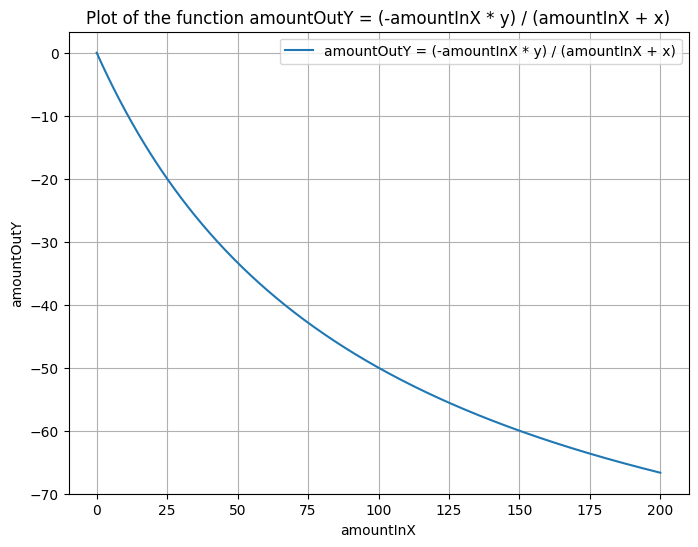

In [3]:
# Assume some arbitrary values for 'y' and 'x'
y = 100
x = 100

amountInX_values = np.linspace(0, 200, 400)

amountOutY_values = (-amountInX_values * y) / (amountInX_values + x)

plt.figure(figsize=(8,6))
plt.plot(amountInX_values, amountOutY_values, label='amountOutY = (-amountInX * y) / (amountInX + x)')
plt.title("Plot of the function amountOutY = (-amountInX * y) / (amountInX + x)")
plt.xlabel("amountInX")
plt.ylabel("amountOutY")
plt.grid(True)
plt.legend()
plt.show()

In [4]:
# Feel free to change amountInX to experiment
x = 100
y = 100
amountInX = 5

amountOutY = (amountInX * y) / (amountInX + x)
amountOutY

4.761904761904762

### Stable Swap invariant curve

$$
\begin{align*}
& a = 0.025 \\
& D = x + y - a \times (x + y) \quad\\
& rx = \frac{x + dx}{x} \\
& b = \frac{x \times (rx - \frac{a}{rx})}{y} - \frac{D}{y} \quad \\
& ry = \frac{\sqrt{b^2 + (a \times 4)} - b}{2} \\
& dy = y \times ry - y \\
\end{align*}
$$


### Formula Description:

- **a:** Amplification coefficient (lower value decreases slippage)
- **x:** Amount of token X.
- **y:** Amount of token Y.
- **dx:** Amount sent by the user into the AMM.
- **dy:** Amount sent out by the AMM to the user.


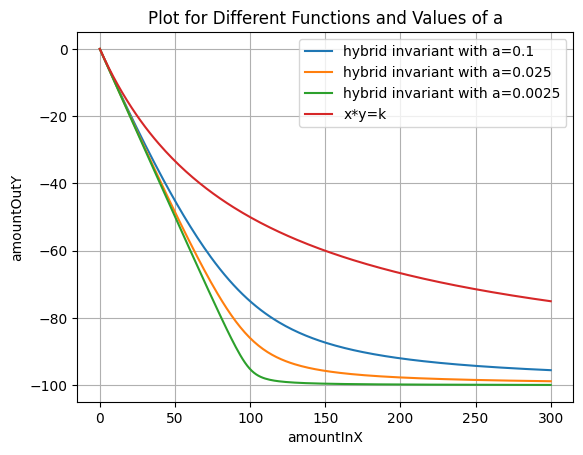

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import math

def hybridInvariant(ax, ay, dx, a):
    D = ax + ay - a * (ax + ay)  # flattened _invariantFunc
    rx = (ax + dx) / ax
    b = (ax * (rx - a / rx)) / ay - D / ay  # flattened _coefficientFunc
    ry = solveQuad(b, a)
    Dy = ay * ry - ay
    return -abs(Dy)

def solveQuad(b, c):
    return (math.sqrt((b * b) + (c * 4)) - b) / 2

# Values for dx
dx_values = np.linspace(0, 300, 200)  # Change the range and number of values as needed

# Specify the different 'a' values
a_values = [0.1, 0.025, 0.0025]

# Assume some arbitrary values for 'y' and 'x'
y = 100
x = 100

for a in a_values:
    # Compute corresponding values for Dy using swapQuoteFunc
    dy_values = [hybridInvariant(100, 100, dx, a) for dx in dx_values]
    # Plot the function
    plt.plot(dx_values, dy_values, label=f'hybrid invariant with a={a}')

# Compute corresponding values for Dy using the new function
amountOutY_values = (-dx_values * y) / (dx_values + x)

# Plot the new function
plt.plot(dx_values, amountOutY_values, label='x*y=k')

plt.xlabel('amountInX')
plt.ylabel('amountOutY')
plt.title('Plot for Different Functions and Values of a')
plt.legend()
plt.grid(True)

# Save the plot as a high-resolution PNG image
plt.savefig('hybrid_plot.png', dpi=300)

plt.show()


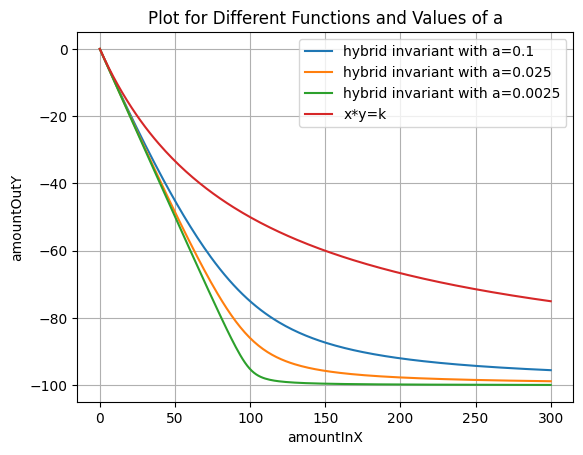

<Figure size 640x480 with 0 Axes>

In [6]:
## Plotting Hybrid Invariant with multiple A coefficient values 
def hybridInvariant(ax, ay, dx, a):
    D = ax + ay - a * (ax + ay)  # flattened _invariantFunc
    rx = (ax + dx) / ax
    b = (ax * (rx - a / rx)) / ay - D / ay  # flattened _coefficientFunc
    ry = solveQuad(b, a)
    Dy = ay * ry - ay
    return -abs(Dy)

def solveQuad(b, c):
    return (math.sqrt((b * b) + (c * 4)) - b) / 2

# Values for dx
dx_values = np.linspace(0, 300, 200)  # Change the range and number of values as needed

# Specify the different 'a' values
a_values = [0.1, 0.025, 0.0025]

# Assume some arbitrary values for 'y' and 'x'
y = 100
x = 100

for a in a_values:
    # Compute corresponding values for Dy using swapQuoteFunc
    dy_values = [hybridInvariant(100, 100, dx, a) for dx in dx_values]
    # Plot the function
    plt.plot(dx_values, dy_values, label=f'hybrid invariant with a={a}')

# Compute corresponding values for Dy using the new function
amountOutY_values = (-dx_values * y) / (dx_values + x)

# Plot the new function
plt.plot(dx_values, amountOutY_values, label='x*y=k')

plt.xlabel('amountInX')
plt.ylabel('amountOutY')
plt.title('Plot for Different Functions and Values of a')
plt.legend()
plt.grid(True)
plt.show()

plt.savefig('hybrid_plot.png', dpi=300)


In [6]:
# Implementation in Solidity using PRBV3 Math

In [7]:
"""
    function swapQuoteFunc(uint256 Ax, uint256 Ay, uint256 Dx) public pure returns (uint256 quote) {
        // @dev Amplification factor
        uint A = 250000000000000; // make this a global variable

        // casting
        SD59x18 _ax = sd(int(Ax));
        SD59x18 _ay = sd(int(Ay));
        SD59x18 _dx = sd(int(Dx));
        SD59x18 _a = sd(int(A));

        // this can be simplified...
        SD59x18 D = _ax + _ay - _a.mul(_ax + _ay); // flattened _invariantFunc
        SD59x18 rx_ = (_ax + _dx).div(_ax);
        SD59x18 b = (_ax * (rx_ - _a.div(rx_))) / _ay - D.div(_ay); // flattened _coefficientFunc
        SD59x18 ry_ = _solveQuad(b, _a);
        SD59x18 Dy = _ay.mul(ry_) - _ay;

        return uint(Dy.abs().unwrap());
    }

    function _solveQuad(SD59x18 b, SD59x18 c) internal pure returns (SD59x18) {
        return (((b.mul(b)) + (c.mul(sd(4e18)))).sqrt().sub(b)).div(sd(2e18));
    }
"""

'\n    function swapQuoteFunc(uint256 Ax, uint256 Ay, uint256 Dx) public pure returns (uint256 quote) {\n        // @dev Amplification factor\n        uint A = 250000000000000; // make this a global variable\n\n        // casting\n        SD59x18 _ax = sd(int(Ax));\n        SD59x18 _ay = sd(int(Ay));\n        SD59x18 _dx = sd(int(Dx));\n        SD59x18 _a = sd(int(A));\n\n        // this can be simplified...\n        SD59x18 D = _ax + _ay - _a.mul(_ax + _ay); // flattened _invariantFunc\n        SD59x18 rx_ = (_ax + _dx).div(_ax);\n        SD59x18 b = (_ax * (rx_ - _a.div(rx_))) / _ay - D.div(_ay); // flattened _coefficientFunc\n        SD59x18 ry_ = _solveQuad(b, _a);\n        SD59x18 Dy = _ay.mul(ry_) - _ay;\n\n        return uint(Dy.abs().unwrap());\n    }\n\n    function _solveQuad(SD59x18 b, SD59x18 c) internal pure returns (SD59x18) {\n        return (((b.mul(b)) + (c.mul(sd(4e18)))).sqrt().sub(b)).div(sd(2e18));\n    }\n'